# **GENDER RECOGNITION USING SUPPORT VECTOR MACHINE (SVM)**

<h3>Step 1 :- Importing necessary libraries for the model implementation</h3>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
%matplotlib inline

<h3>Step 2 :- Visualising some data from dataset</h3>

In [3]:
# Importing the dataset
df = pd.read_csv('voice.csv')
# Glimse of complete dataset
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
X=df.iloc[:, :-1]
X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


# Encoding

In [5]:
from sklearn.preprocessing import LabelEncoder
Y=df.iloc[:,-1]

# Encode label category
# male --> 1  and   female --> 0

gender_encoder = LabelEncoder()
Y = gender_encoder.fit_transform(Y)


In [6]:
ml = np.count_nonzero(Y == 1)
fe = np.count_nonzero(Y == 0)
print("Male count   :   ",ml, "\nFemale count :   ",fe)

Male count   :    1584 
Female count :    1584


# Step 3 : Scaling the dataset

In [7]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)


In [8]:
from sklearn.model_selection import train_test_split
# Test values of size --> 20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

<h1> Default Model Implementation</h1>

In [9]:
from sklearn.svm import SVC
from sklearn import metrics
import time
svc=SVC() #Default hyperparameters
start = time.perf_counter()
svc.fit(X_train,Y_train)
end = time.perf_counter()
Y_pred=svc.predict(X_test)
print('Accuracy Score   :  ',end=" ")
print(metrics.accuracy_score(Y_test,Y_pred))
print("Time Taken : "+str(end-start))

Accuracy Score   :   0.9826498422712934
Time Taken : 0.15298510000000043


# Classification Report

In [57]:
def classify(model,x_train,y_train,x_test,y_test):
    from sklearn.metrics import classification_report
    target_names = ['male', 'female']
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    print(classification_report(Y_test, Y_pred, target_names=target_names, digits=4))

In [11]:
classify(svc,X_train,Y_train,X_test,Y_test)

              precision    recall  f1-score   support

        male     0.9767    0.9865    0.9816       297
      female     0.9880    0.9792    0.9836       337

    accuracy                         0.9826       634
   macro avg     0.9823    0.9829    0.9826       634
weighted avg     0.9827    0.9826    0.9827       634



In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, cohen_kappa_score
accscore = accuracy_score (Y_test, Y_pred)
recscore = recall_score (Y_test, Y_pred)
f1score = f1_score (Y_test, Y_pred)
kappascore =cohen_kappa_score(Y_test,Y_pred)
prescor = precision_score(Y_test, Y_pred)

In [13]:
print("Accuracy score :"+str(accscore))
print("Precision score :"+str(prescor))
print("Recall score :"+str(recscore))
print("F1 score :"+str(f1score))

Accuracy score :0.9826498422712934
Precision score :0.9880239520958084
Recall score :0.9792284866468842
F1 score :0.9836065573770492


# Confusion Matrix

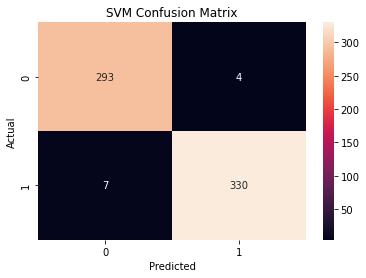

In [14]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test,Y_pred)
sns.heatmap(conf_matrix,annot=True,fmt=".0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("SVM Confusion Matrix")
plt.show()

# ROC Curve

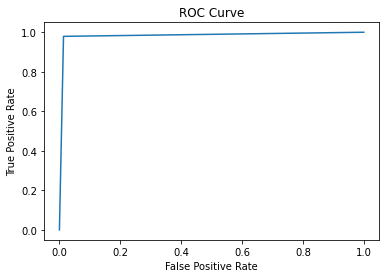

Area Under ROC Curve: 0.9828802365894354


In [15]:
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, thresholds = metrics.roc_curve(Y_test, Y_pred, pos_label=0)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.plot(tpr1,fpr1)
plt.show()
auc = np.trapz(fpr1,tpr1)
print("Area Under ROC Curve:", auc)

In [16]:
# col_lables = ('meanfreq','sd','	median','	Q25','	Q75','	IQR	skew','	kurt','	sp.ent','	sfm	mode','	centroid','	meanfun','	minfun','	maxfun','	meandom','	mindom','	maxdom','	dfrange','	modindx','	label')
col_lables = []
col_labels = [col_lables.append(i) for i in range(1, 20)]
print(len(col_lables))

19


<h1> Linear Kernel Model Implementation</h1>

In [17]:
# Linear model to train and test for df
svc_linear=SVC(kernel='linear')
start = time.perf_counter()
svc_linear.fit(X_train,Y_train)
end = time.perf_counter()
Y_pred=svc_linear.predict(X_test)
print('Accuracy Score   :   ',end=" ")
print(metrics.accuracy_score(Y_test,Y_pred))
print("Time Taken : "+str(end-start))

Accuracy Score   :    0.9763406940063092
Time Taken : 0.0674168000005011


In [18]:
#cv is cross validation score parameter

from sklearn.model_selection import cross_val_score
svc_linear=SVC(kernel='linear')

scores = cross_val_score(svc_linear, X, Y, cv=10, scoring='accuracy') 
print("Scores array   :   ",scores)
print("Mean score of values :  ",scores.mean())
print(len(scores))

Scores array   :    [0.91167192 0.97160883 0.97160883 0.97791798 0.95899054 0.9873817
 0.99369085 0.97791798 0.95253165 0.99367089]
Mean score of values :   0.9696991175178692
10


Finding best value for cross val range

In [19]:
cross_val_range=list(range(1,16))
acc_score=[]
for c in cross_val_range:
    svc_linear = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc_linear, X, Y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())

print("Printing the acuuracy scores for Regularization parameter in range 1 to 15 :  ")
print(acc_score)
print("Maximum accuracy   :   ",max(acc_score))

Printing the acuuracy scores for Regularization parameter in range 1 to 15 :  
[0.9696991175178692, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.9693836601046201, 0.9693836601046201, 0.969068202691371, 0.9687527452781215, 0.9684372878648724, 0.9684372878648724, 0.9684372878648724, 0.9684372878648724, 0.9681208321686698, 0.9681208321686698, 0.9681208321686698]
Maximum accuracy   :    0.9696991175178692


Text(0, 0.5, 'Cross-Validated Accuracy')

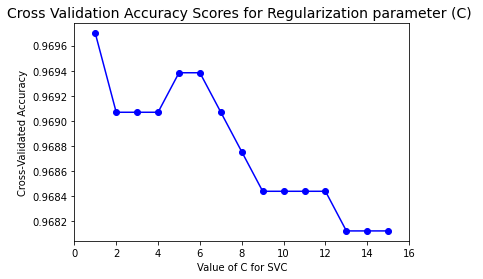

In [14]:

cross_val_range=list(range(1,16))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(cross_val_range,acc_score, color='blue', marker='o')
plt.xticks(np.arange(0,18,2))
plt.title('Cross Validation Accuracy Scores for Regularization parameter (C) ', fontsize=14)
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')


In [15]:
cross_val_range=list(np.arange(0.1,3,0.1))
acc_score=[]
for c in cross_val_range:
    svc_linear = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc_linear, X, Y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print("Printing the acuuracy scores for Regularization parameter in range 0.1 to 3 at gap of 0.1   :  ")
print(acc_score)
print("Maximum accuracy   :   ",max(acc_score))


Printing the acuuracy scores for Regularization parameter in range 0.1 to 3 at gap of 0.1   :  
[0.9706474863235236, 0.9693846583875733, 0.9693836601046201, 0.9693836601046201, 0.9696991175178692, 0.9696991175178692, 0.9693836601046201, 0.9696981192349158, 0.9693826618216667, 0.9696991175178692, 0.9696991175178692, 0.9696991175178692, 0.9696991175178692, 0.9690672044084174, 0.9693836601046201, 0.9693836601046201, 0.9693836601046201, 0.9693836601046201, 0.969068202691371, 0.969068202691371, 0.9693836601046201, 0.9693836601046201, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371]
Maximum accuracy   :    0.9706474863235236


Text(0, 0.5, 'Cross-Validated Accuracy')

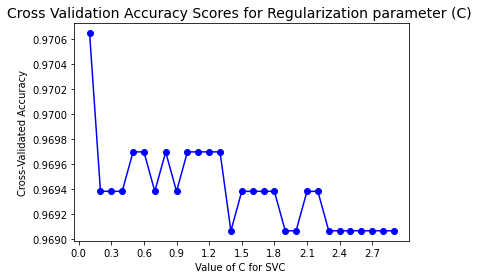

In [16]:

cross_val_range=list(np.arange(0.1,3,0.1))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(cross_val_range,acc_score, color='blue', marker='o')
plt.xticks(np.arange(0.0,3,0.3))
plt.title('Cross Validation Accuracy Scores for Regularization parameter (C) ', fontsize=14)
plt.xlabel('Value of C for SVC ')
plt.ylabel('Cross-Validated Accuracy')

In [18]:
cross_val_range=list(np.arange(0.001,0.2,0.001))
acc_score=[]
for c in cross_val_range:
    svc_linear = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc_linear, X, Y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
#print("Printing the acuuracy scores for Regularization parameter in range 0.001 to 0.2 at gap of 0.001   :  ")
print(acc_score)
print("Maximum accuracy   :   ",max(acc_score))

[0.9229824701513397, 0.9545521702671407, 0.9627560595775266, 0.9646498023399752, 0.9652807171664737, 0.9649652597532243, 0.9659116319929721, 0.9659116319929719, 0.967173461645969, 0.967173461645969, 0.9668580042327196, 0.9668580042327196, 0.9659116319929721, 0.9665435451024237, 0.966229085972128, 0.9671754582118754, 0.9668600007986263, 0.9671754582118754, 0.9678063730383741, 0.9684372878648725, 0.9687517469951683, 0.9687517469951683, 0.9687517469951683, 0.9687517469951683, 0.9687517469951683, 0.968436289581919, 0.9681208321686698, 0.9681208321686698, 0.9690672044084174, 0.9693826618216667, 0.9690672044084174, 0.9693836601046201, 0.9690672044084174, 0.9693826618216667, 0.9690672044084174, 0.9693826618216667, 0.9693836601046201, 0.9696991175178693, 0.9696991175178692, 0.9700155732140718, 0.9697001158008227, 0.970016571497025, 0.970016571497025, 0.970016571497025, 0.970016571497025, 0.970016571497025, 0.970016571497025, 0.9703320289102745, 0.9703320289102745, 0.9706474863235236, 0.9706474

Text(0, 0.5, 'Cross-Validated Accuracy')

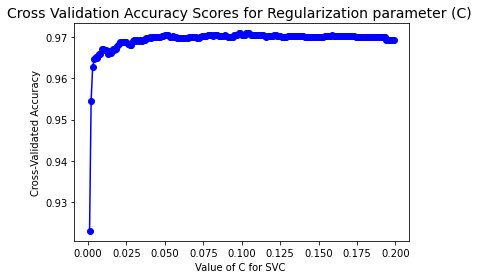

In [18]:

cross_val_range=list(np.arange(0.001,0.2,0.001))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(cross_val_range,acc_score, color='blue', marker='o')
plt.title('Cross Validation Accuracy Scores for Regularization parameter (C) ', fontsize=14)
plt.xlabel('Value of C for SVC ')
plt.ylabel('Cross-Validated Accuracy')

# Fitting the model with best value of c


In [19]:
# Linear model to train and test for df
svc_linear=SVC(kernel='linear', C=0.014)
start = time.perf_counter()
svc_linear.fit(X_train,Y_train)
end = time.perf_counter()
Y_pred=svc_linear.predict(X_test)
print('Accuracy Score   :   ', metrics.accuracy_score(Y_test,Y_pred))
print('Recall           :   ', metrics.recall_score(Y_test, Y_pred))
print('F1-Score         :   ', metrics.f1_score(Y_test,Y_pred ))
print('Precison Score   :   ', metrics.precision_score(Y_test,Y_pred ))
print("Time Taken       :    "+str(end-start))

Accuracy Score   :    0.9794952681388013
Recall           :    0.9762611275964391
F1-Score         :    0.9806259314456035
Precison Score   :    0.9850299401197605
Time Taken       :    0.06297730000005686


# ROC Curve

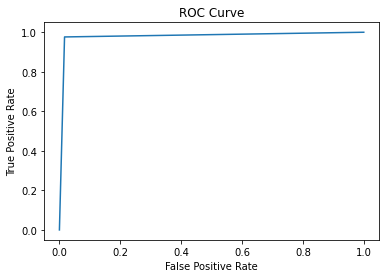

Area Under ROC Curve: 0.9797130553807112


In [20]:
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, thresholds = metrics.roc_curve(Y_test, Y_pred, pos_label=0)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.plot(tpr1,fpr1)
plt.show()
auc = np.trapz(fpr1,tpr1)
print("Area Under ROC Curve:", auc)

# Confusion Matrix

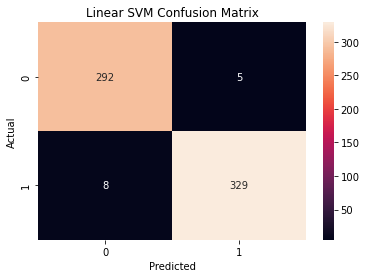

In [21]:

conf_matrix = confusion_matrix(Y_test,Y_pred)
sns.heatmap(conf_matrix,annot=True,fmt=".0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Linear SVM Confusion Matrix")
plt.show()

# Classification Report

In [22]:
from sklearn.metrics import classification_report
report = classification_report(Y_test,Y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       297
           1       0.99      0.98      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [23]:
acc_score=[]
svc_linear = SVC(kernel='linear', C=0.014)
scores = cross_val_score(svc_linear, X, Y, cv=19, scoring='accuracy')
acc_score.append(scores.mean())

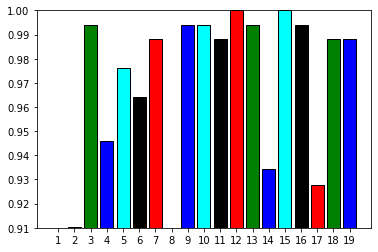

In [24]:

colors=['black', 'red', 'green', 'blue', 'cyan']
x_pos=np.arange(len(col_lables))

# Create names on the x-axis
plt.xticks(x_pos, col_lables)
plt.ylim(0.91, 1.0)

plt.bar(x_pos , height=scores,color=colors, edgecolor='black', align='center')

# Show graph
plt.show()



<h1> RBF Model Implementation</h1>

In [25]:
# RBF model
svc_rbf =SVC(kernel='rbf')
start = time.perf_counter()
svc_rbf.fit(X_train,Y_train)
end = time.perf_counter()
Y_pred=svc_rbf.predict(X_test)
print('Accuracy Score   :   ',end=" ")
print(metrics.accuracy_score(Y_test,Y_pred))
print("Time Taken : "+str(end-start))

Accuracy Score   :    0.9826498422712934
Time Taken : 0.07279759999983071


In [26]:
#cv is cross validation score parameter
from sklearn.model_selection import cross_val_score
svc_rbf=SVC(kernel='rbf')
scores = cross_val_score(svc_rbf, X, Y, cv=10, scoring='accuracy') 
print("Scores array   :   ",scores)
print("Mean score of values :  ",scores.mean())

Scores array   :    [0.93375394 0.95583596 0.96845426 0.96214511 0.96529968 0.99684543
 0.99053628 0.98422713 0.91455696 0.99367089]
Mean score of values :   0.9665325639899376


In [27]:
cross_val_range=[0.001,0.003, 0.005,0.007, 0.009, 0.011, 0.013]
acc_score=[]
for g in cross_val_range:
    svc_rbf = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc_rbf, X, Y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())

print("Printing the acuuracy scores for Regularization parameter in range 0.001 to 0.013 at gap of 0.002 :  ")
print(acc_score)
print("Maximum accuracy   :   ",max(acc_score))

Printing the acuuracy scores for Regularization parameter in range 0.001 to 0.013 at gap of 0.002 :  
[0.9551820868106857, 0.9662290859721278, 0.9668570059497663, 0.967170466797109, 0.9678023799065606, 0.968432296450106, 0.9681168390368565]
Maximum accuracy   :    0.968432296450106


Text(0, 0.5, 'Cross-Validated Accuracy')

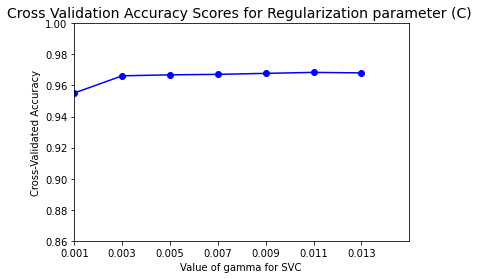

In [28]:
cross_val_range=[0.001,0.003, 0.005,0.007, 0.009, 0.011, 0.013]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(cross_val_range,acc_score, color='blue', marker='o')
plt.title('Cross Validation Accuracy Scores for Regularization parameter (C) ', fontsize=14)
plt.xlabel('Value of gamma for SVC ')
plt.xticks(np.arange(0.001,0.015, 0.002))
plt.xlim(0.001,0.015)
plt.ylim(0.86,1)
plt.ylabel('Cross-Validated Accuracy')

Fitting the model with best value of gamma

In [31]:
# RBF model
svc_rbf =SVC(kernel='rbf', gamma=0.01)
start = time.perf_counter()
svc_rbf.fit(X_train,Y_train)
end = time.perf_counter()
Y_pred=svc_rbf.predict(X_test)

print('Accuracy Score   :   ', metrics.accuracy_score(Y_test,Y_pred))
print('Recall           :   ', metrics.recall_score(Y_test, Y_pred))
print('F1-Score         :   ', metrics.f1_score(Y_test,Y_pred ))
print('Precison Score   :   ', metrics.precision_score(Y_test,Y_pred ))
print("Time Taken       :    "+str(end-start))

Accuracy Score   :    0.9826498422712934
Recall           :    0.9821958456973294
F1-Score         :    0.9836552748885588
Precison Score   :    0.9851190476190477
Time Taken       :    0.10436219999996865


# ROC Curve

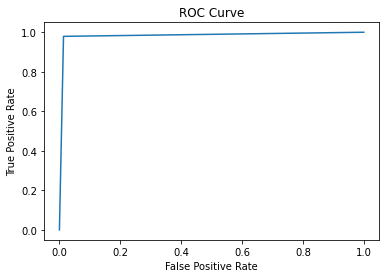

Area Under ROC Curve: 0.9828802365894354


In [31]:
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, thresholds = metrics.roc_curve(Y_test, Y_pred, pos_label=0)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.plot(tpr1,fpr1)
plt.show()
auc = np.trapz(fpr1,tpr1)
print("Area Under ROC Curve:", auc)

# Confusion Matrix

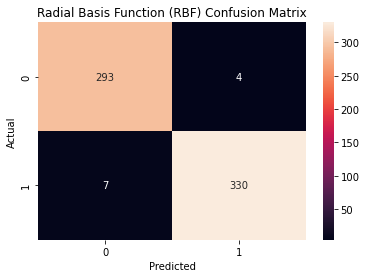

In [32]:

conf_matrix = confusion_matrix(Y_test,Y_pred)
sns.heatmap(conf_matrix,annot=True,fmt=".0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Radial Basis Function (RBF) Confusion Matrix")
plt.show()

# Classification Report

In [33]:
from sklearn.metrics import classification_report
report = classification_report(Y_test,Y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       297
           1       0.99      0.98      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [34]:
from sklearn.model_selection import cross_val_score
svc_rbf=SVC(kernel='rbf', gamma=0.01)
scores = cross_val_score(svc_rbf, X, Y, cv=19, scoring='accuracy') 

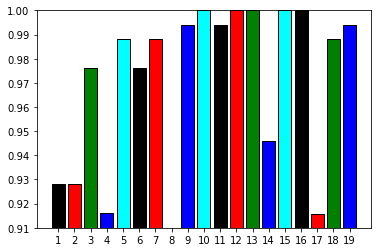

In [35]:
 
colors=['black', 'red', 'green', 'blue', 'cyan']
x_pos=np.arange(len(col_lables))

# Create names on the x-axis
plt.xticks(x_pos, col_lables)
plt.ylim(0.91, 1.0)

plt.bar(x_pos , height=scores, color=colors, edgecolor='black', align='center')

# Show graph
plt.show()

<h1> Polynomial Model Implementation</h1>

In [36]:
# Polynomial Model
svc_ploynomial=SVC(kernel='poly')
start = time.perf_counter()
svc_ploynomial.fit(X_train,Y_train)
end = time.perf_counter()
Y_pred=svc_ploynomial.predict(X_test)
print('Accuracy Score   :   ',end=" ")
print(metrics.accuracy_score(Y_test,Y_pred))
print("Time Taken : "+str(end-start))

Accuracy Score   :    0.9684542586750788
Time Taken : 0.08981540000058885


In [37]:
from sklearn.model_selection import cross_val_score
svc_ploynomial=SVC(kernel='poly')
scores = cross_val_score(svc_ploynomial, X, Y, cv=10, scoring='accuracy') #cv is cross validation
print("Scores array   :   ",scores)
print("Mean score of values :  ",scores.mean())

Scores array   :    [0.89274448 0.94952681 0.93059937 0.92744479 0.94952681 0.99369085
 0.98422713 0.96529968 0.87974684 0.9778481 ]
Mean score of values :   0.9450654873617378


In [38]:
cross_val_range=[2,3,4,5,6] # Degrees 
acc_score=[]
for d in cross_val_range:
    svc_ploynomial = SVC(kernel='poly', degree=d)
    scores = cross_val_score(svc_ploynomial, X, Y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print("Printing the acuuracy scores for degree in range 2 to 6 :  ")
print(acc_score)
print("Maximum accuracy   :   ",max(acc_score))

Printing the acuuracy scores for degree in range 2 to 6 :  
[0.8515842750469194, 0.9450654873617378, 0.8313989937307829, 0.8661622010142555, 0.7736463283152977]
Maximum accuracy   :    0.9450654873617378


Text(0, 0.5, 'Cross-Validated Accuracy')

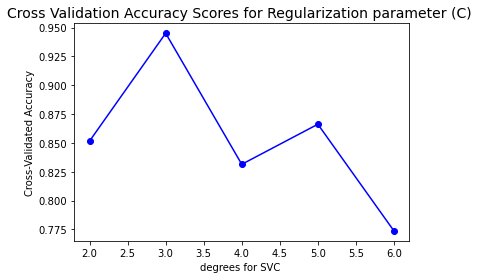

In [38]:

cross_val_range=[2,3,4,5,6]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(cross_val_range,acc_score,color='blue', marker='o')
plt.title('Cross Validation Accuracy Scores for Regularization parameter (C) ', fontsize=14)
plt.xlabel('degrees for SVC ')
plt.ylabel('Cross-Validated Accuracy')

Fitting the model with best value of degree 

In [38]:
# Polynomial Model
svc_ploynomial=SVC(kernel='poly', degree=3)
svc_ploynomial.fit(X_train,Y_train)
Y_pred=svc_ploynomial.predict(X_test)

print('Accuracy Score   :   ', metrics.accuracy_score(Y_test,Y_pred))
print('Recall           :   ', metrics.recall_score(Y_test, Y_pred))
print('F1-Score         :   ', metrics.f1_score(Y_test,Y_pred ))
print('Precison Score   :   ', metrics.precision_score(Y_test,Y_pred ))
print("Time Taken       :    "+str(end-start))

Accuracy Score   :    0.9684542586750788
Recall           :    0.9851632047477745
F1-Score         :    0.9707602339181286
Precison Score   :    0.9567723342939481
Time Taken       :    0.10512549999998555


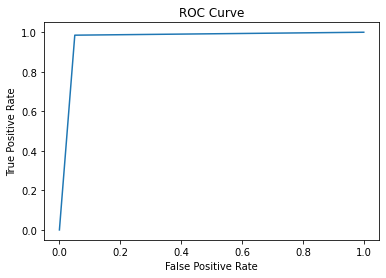

Area Under ROC Curve: 0.967329077121362


In [40]:
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, thresholds = metrics.roc_curve(Y_test, Y_pred, pos_label=0)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.plot(tpr1,fpr1)
plt.show()
auc = np.trapz(fpr1,tpr1)
print("Area Under ROC Curve:", auc)

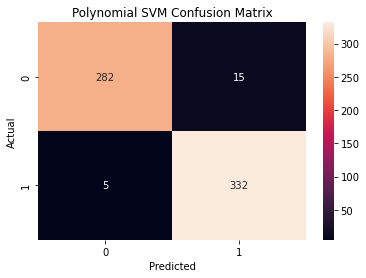

In [41]:

conf_matrix = confusion_matrix(Y_test,Y_pred)
sns.heatmap(conf_matrix,annot=True,fmt=".0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Polynomial SVM Confusion Matrix")
plt.show()

In [42]:
from sklearn.metrics import classification_report
report = classification_report(Y_test,Y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       297
           1       0.96      0.99      0.97       337

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



In [43]:
from sklearn.model_selection import cross_val_score
svc_ploynomial=SVC(kernel='poly', degree=3)
scores = cross_val_score(svc_ploynomial, X, Y, cv=19, scoring='accuracy') #cv is cross validation

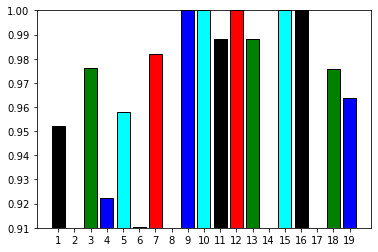

In [44]:
 
colors=['black', 'red', 'green', 'blue', 'cyan']
x_pos=np.arange(len(col_lables))

# Create names on the x-axis
plt.xticks(x_pos, col_lables)
plt.ylim(0.91, 1.0)

plt.bar(x_pos , height=scores, color=colors, edgecolor='black', align='center')

# Show graph
plt.show()

# Multiple Model Implementation using Grid Search CV

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
support_vector = GridSearchCV(SVC(),
    {   'gamma':list(np.array([0.01, 0.02, 0.03])),
        'C':list(np.array([0.09, 0.10, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16])),
        'kernel':['rbf','linear','poly','sigmoid','gaussian'],
        'degree':[2, 3, 4, 5]
    },
    cv=10,
    return_train_score=False)


# printing the results metrics
support_vector.cv_results_

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\use5r\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 175, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\use5r\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFail

{'mean_fit_time': array([0.16109936, 0.03931804, 0.22694809, 0.2015461 , 0.00474198,
        0.13650091, 0.03278637, 0.22081246, 0.18681006, 0.0013859 ,
        0.15151045, 0.03396173, 0.18281069, 0.13963013, 0.00178401,
        0.15380764, 0.03937073, 0.2378408 , 0.2043927 , 0.00077441,
        0.14956257, 0.03397503, 0.20831296, 0.16209071, 0.00238895,
        0.10678194, 0.03520904, 0.1504698 , 0.13669086, 0.00173218,
        0.14584825, 0.03039103, 0.2892096 , 0.2620894 , 0.00130868,
        0.16625094, 0.03961744, 0.24155135, 0.24587526, 0.00206101,
        0.15714443, 0.03374257, 0.2336112 , 0.14327178, 0.00102134,
        0.15495708, 0.03634584, 0.24174135, 0.19919918, 0.00245602,
        0.12597857, 0.03529863, 0.21109519, 0.17126222, 0.00116384,
        0.10996532, 0.03768663, 0.18307807, 0.14236023, 0.00253718,
        0.1483743 , 0.0399097 , 0.21514719, 0.18873487, 0.0025039 ,
        0.11619384, 0.03669081, 0.20773044, 0.15340996, 0.0015769 ,
        0.11168742, 0.03326333,

In [47]:
support_vector.best_estimator_

SVC(C=0.11, degree=2, gamma=0.01, kernel='linear')

In [48]:
support_vector.best_score_

0.9743549842830911

In [49]:
support_vector.best_params_

{'C': 0.11, 'degree': 2, 'gamma': 0.01, 'kernel': 'linear'}

In [50]:
support_vector.n_splits_

10

In [51]:
support_vector.refit_time_

0.036394357681274414

In [52]:
support_vector.multimetric_

False

In [10]:
support_vector = SVC(C =  0.11, degree =  2, gamma =  0.01, kernel =  'linear')

In [14]:
from sklearn.metrics import roc_curve, auc
start = time.perf_counter()
support_vector.fit(X_train,Y_train)
end = time.perf_counter()
Y_pred = support_vector.predict(X_test) 
print('Accuracy Score   :  ',end=" ")
print(metrics.accuracy_score(Y_test,Y_pred))
print("Time Taken       :   "+str(end-start))

Accuracy Score   :   0.9779179810725552
Time Taken       :   0.05341420000002017


# ROC Curve

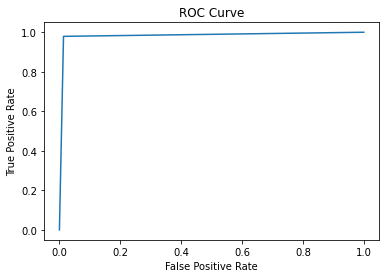

Area Under ROC Curve: 0.9828802365894354


In [60]:
fpr1, tpr1, thresholds = metrics.roc_curve(Y_test, Y_pred, pos_label=0)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.plot(tpr1,fpr1)
plt.show()
auc = np.trapz(fpr1,tpr1)
print("Area Under ROC Curve:", auc)

# Classification Report

In [58]:
from sklearn.metrics import classification_report
grid_predictions = support_vector.predict(X_test)
# print classification report
print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           0       0.98      0.99      0.98       297
           1       0.99      0.98      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



# Confusion Matrix

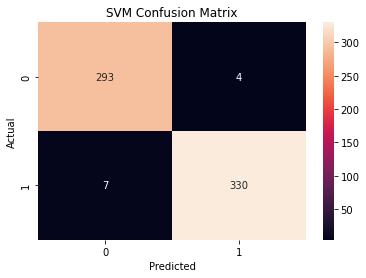

In [59]:
conf_matrix = confusion_matrix(Y_test,Y_pred)
sns.heatmap(conf_matrix,annot=True,fmt=".0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("SVM Confusion Matrix")
plt.show()

<h1>Comparisions</h1>

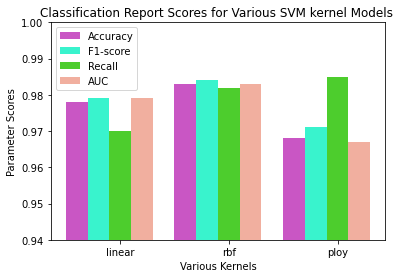

<Figure size 432x288 with 0 Axes>

In [54]:
import numpy as np
import matplotlib.pyplot as plt

N = 3
ind = np.arange(N)
width = 0.20

# accuracy
wvals = [0.978, 0.983, 0.968]
bar1 = plt.bar(ind, wvals, width, color = '#C956C4')

# f1-score
xvals = [0.979, 0.984, 0.971]
bar2 = plt.bar(ind+width, xvals, width, color = '#39F3CD')

# recall
yvals = [0.970, 0.982, 0.985]
bar3 = plt.bar(ind+width*2, yvals, width, color='#4DCD2D')

# auc
zvals = [0.979, 0.983, 0.967]
bar4 = plt.bar(ind+width*3, zvals, width, color = '#F1AF9F')

plt.xlabel("Various Kernels")
plt.ylabel('Parameter Scores')
plt.title("Classification Report Scores for Various SVM kernel Models ")

plt.xticks(ind+width*2,['linear', 'rbf', 'ploy'])
plt.ylim(0.94, 1)
plt.legend( (bar1, bar2, bar3, bar4), ('Accuracy', 'F1-score', 'Recall', 'AUC') )
plt.show()
plt.savefig('compare.png', dpi=300, bbox_inches='tight')